# 6.6 Sourcing & Analyzing Time-Series Data¶

## This script contains the following:
 ### Importing  libraries and data
 ### Data cleaning 
 ### Time series analysis: decomposition
 ### Testing for stationarity

## Importing libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API Key
quandl.ApiConfig.api_key = '7vwpMPHPkxFHvzTsN52c'

In [4]:
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Online Shopping Analysis\Data'

In [5]:
path

'C:\\Users\\BhuwanDhakal\\Sunita\\Projects\\2 Data Immersion\\Advanced analytics $ Dashboard Desigh\\Online Shopping Analysis\\Data'

In [6]:
df =  pd.read_excel(os.path.join(path, 'Prepared Data', 'Cleaned_Data.xlsx'))

In [7]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


In [8]:
df.shape

(52924, 20)

## Data Cleaning

In [22]:
# In Location column Replacing Chicago as Illinois,
df['Location'].replace({'Chicago': 'Illinois'}, inplace = True)

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df1 = df[['Transaction_Date','Online_Spend' ]]

In [25]:
df1.dtypes

Transaction_Date    datetime64[ns]
Online_Spend               float64
dtype: object

In [42]:
#Creating the daily sum of online spend

df2 = df1.resample('D', on='Transaction_Date').sum()

In [50]:
df2.head()

,Online_Spend
Transaction_Date,
2019-01-01,215780.50
2019-01-02,400241.40
2019-01-03,326310.66
2019-01-04,494924.95
2019-01-05,766451.70


In [51]:
df2.shape

(365, 1)

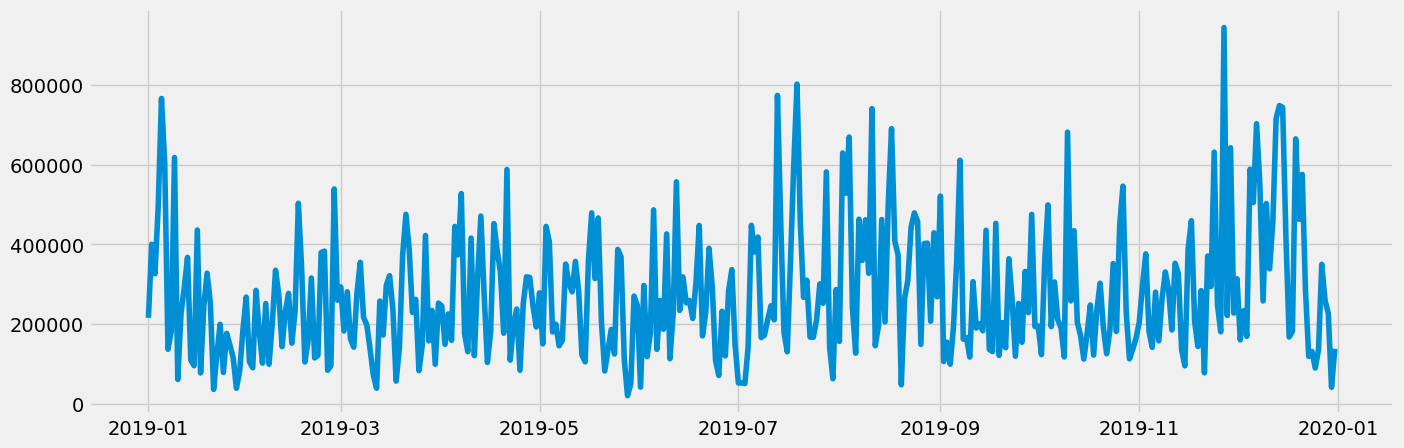

In [52]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(df2)

## Time-series analysis: decomposition

In [53]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [54]:
 from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

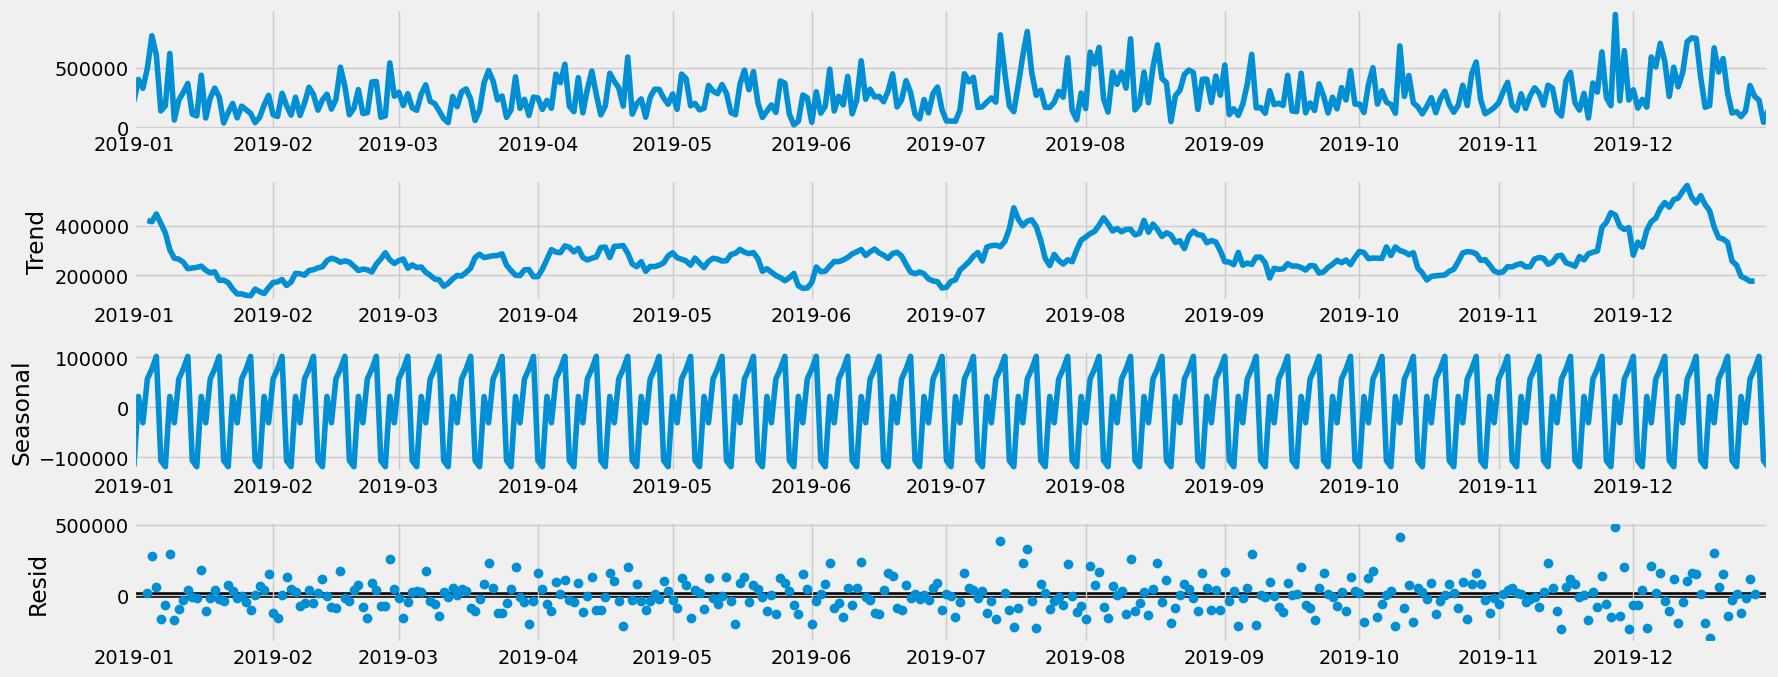

In [55]:
# Plot the separate components

decomposition.plot()
plt.show()

#### From the decomposition plot above we can see that the trend of online spend is fairly consistent over the months except for some holidays. 

#### Espesally the Online Spend increase during Independent day, Christmas and New Year

## Testing for Stationary

In [56]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Online_Spend'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.369406
p-value                          0.012047
Number of Lags Used             13.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64


#### From above Dickey-Fuller Stationarity test result, Test Statistics is smaller than Critical Value (1% = -3.449119)so we can reject null hypothesis indicating data is stationary
#### The p-value is 0.0122047 which is less than 0.05 so result is significant


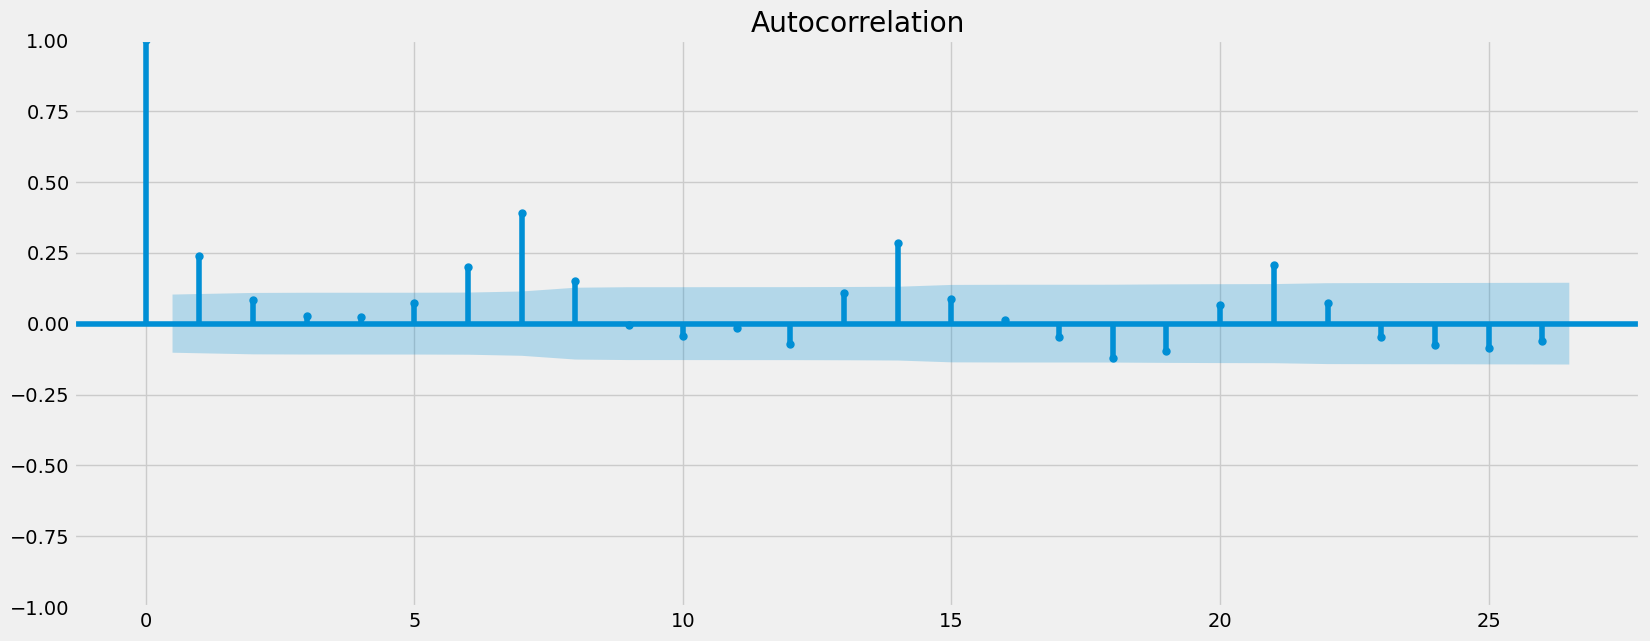

In [57]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

#### There is no Autocorrelation in the dataset indicating the data is Stationary.